In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from joblib import load

In [87]:
X, y = load('../../preprocesiranje/clustering_data.joblib')

### Dodatno sređivanje baze

brisanje slabo korelisanih atributa

In [88]:
X.drop(['age', 'gender', 'travel_time', 'dislike_hw'], inplace = True, axis = 1)
X

,occupation,time_bp,time_dp,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,prefer,certaindays_hw
0,5,7,5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5,100,0,2
1,6,7,11,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0,1111,0,1
2,5,7,7,2,2,1.0,0.0,0.5,0.5,0.5,0.5,1100,0,2
3,5,7,7,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5,100,0,2
4,5,7,7,2,2,0.0,0.0,0.0,0.0,0.5,0.0,1010,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,1,9,9,2,1,0.5,-0.5,-0.5,0.5,0.0,0.0,10,0,2
1171,2,5,12,3,5,-0.5,-1.0,-0.5,0.0,-0.5,-0.5,100,0,0
1172,7,9,11,3,2,0.5,0.5,0.5,0.5,0.0,0.0,1111,0,0
1173,7,11,12,2,2,0.0,0.0,0.0,-1.0,0.0,-0.5,1111,0,2


In [89]:
time_change = X['time_dp'] - X['time_bp']
X['time_change'] = time_change

X.drop(['time_dp', 'time_bp'], inplace = True, axis = 1)
X

,occupation,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,prefer,certaindays_hw,time_change
0,5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5,100,0,2,-2
1,6,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0,1111,0,1,4
2,5,2,2,1.0,0.0,0.5,0.5,0.5,0.5,1100,0,2,0
3,5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5,100,0,2,0
4,5,2,2,0.0,0.0,0.0,0.0,0.5,0.0,1010,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,1,2,1,0.5,-0.5,-0.5,0.5,0.0,0.0,10,0,2,0
1171,2,3,5,-0.5,-1.0,-0.5,0.0,-0.5,-0.5,100,0,0,7
1172,7,3,2,0.5,0.5,0.5,0.5,0.0,0.0,1111,0,0,2
1173,7,2,2,0.0,0.0,0.0,-1.0,0.0,-0.5,1111,0,2,1


razlika vremena provedenog na posao pre i tokom korone

In [90]:
from sklearn.preprocessing import MinMaxScaler

In [91]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(data = X_scaled, columns = X.columns)

In [7]:
X_scaled.head()

,occupation,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,prefer,certaindays_hw,time_change
0,0.714286,0.50,0.50,0.50,0.50,0.75,1.00,0.25,0.25,0.089189,0.0,1.0,0.400000
1,0.857143,0.75,0.25,0.25,0.75,0.00,1.00,1.00,1.00,1.000000,0.0,0.5,0.800000
2,0.714286,0.25,0.25,1.00,0.50,0.75,0.75,0.75,0.75,0.990090,0.0,1.0,0.533333
3,0.714286,0.50,0.00,0.50,1.00,0.75,0.50,0.00,0.25,0.089189,0.0,1.0,0.533333
4,0.714286,0.25,0.25,0.50,0.50,0.50,0.50,0.75,0.50,0.909009,0.0,1.0,0.533333


In [8]:
X_scaled.describe()

,occupation,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,prefer,certaindays_hw,time_change
count,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000
mean,0.700426,0.383404,0.438085,0.504468,0.445532,0.573404,0.630213,0.517872,0.541489,0.661118,0.288511,0.614894,0.570440
std,0.321849,0.316902,0.308950,0.307542,0.310608,0.321843,0.343413,0.313318,0.270717,0.421622,0.453263,0.413764,0.180016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.428571,0.000000,0.250000,0.250000,0.250000,0.250000,0.500000,0.250000,0.250000,0.089189,0.000000,0.000000,0.466667
50%,0.714286,0.250000,0.500000,0.500000,0.500000,0.750000,0.750000,0.500000,0.500000,0.900901,0.000000,0.500000,0.533333
75%,1.000000,0.750000,0.750000,0.750000,0.750000,0.750000,1.000000,0.750000,0.750000,0.990090,1.000000,1.000000,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
from sklearn.decomposition import PCA

In [11]:
# np.cumsum(pca.explained_variance_ratio_)

array([0.33993836, 0.4934054 , 0.6228527 , 0.70475298, 0.77883361,
       0.84390003, 0.88896067, 0.9166655 , 0.93876045, 0.95760429,
       0.97545752, 0.99029263, 1.        ])

In [108]:
pca = PCA(n_components = 3)

X_pca = pca.fit_transform(X_scaled)

# Hijerarhijsko klasterovanje

In [93]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

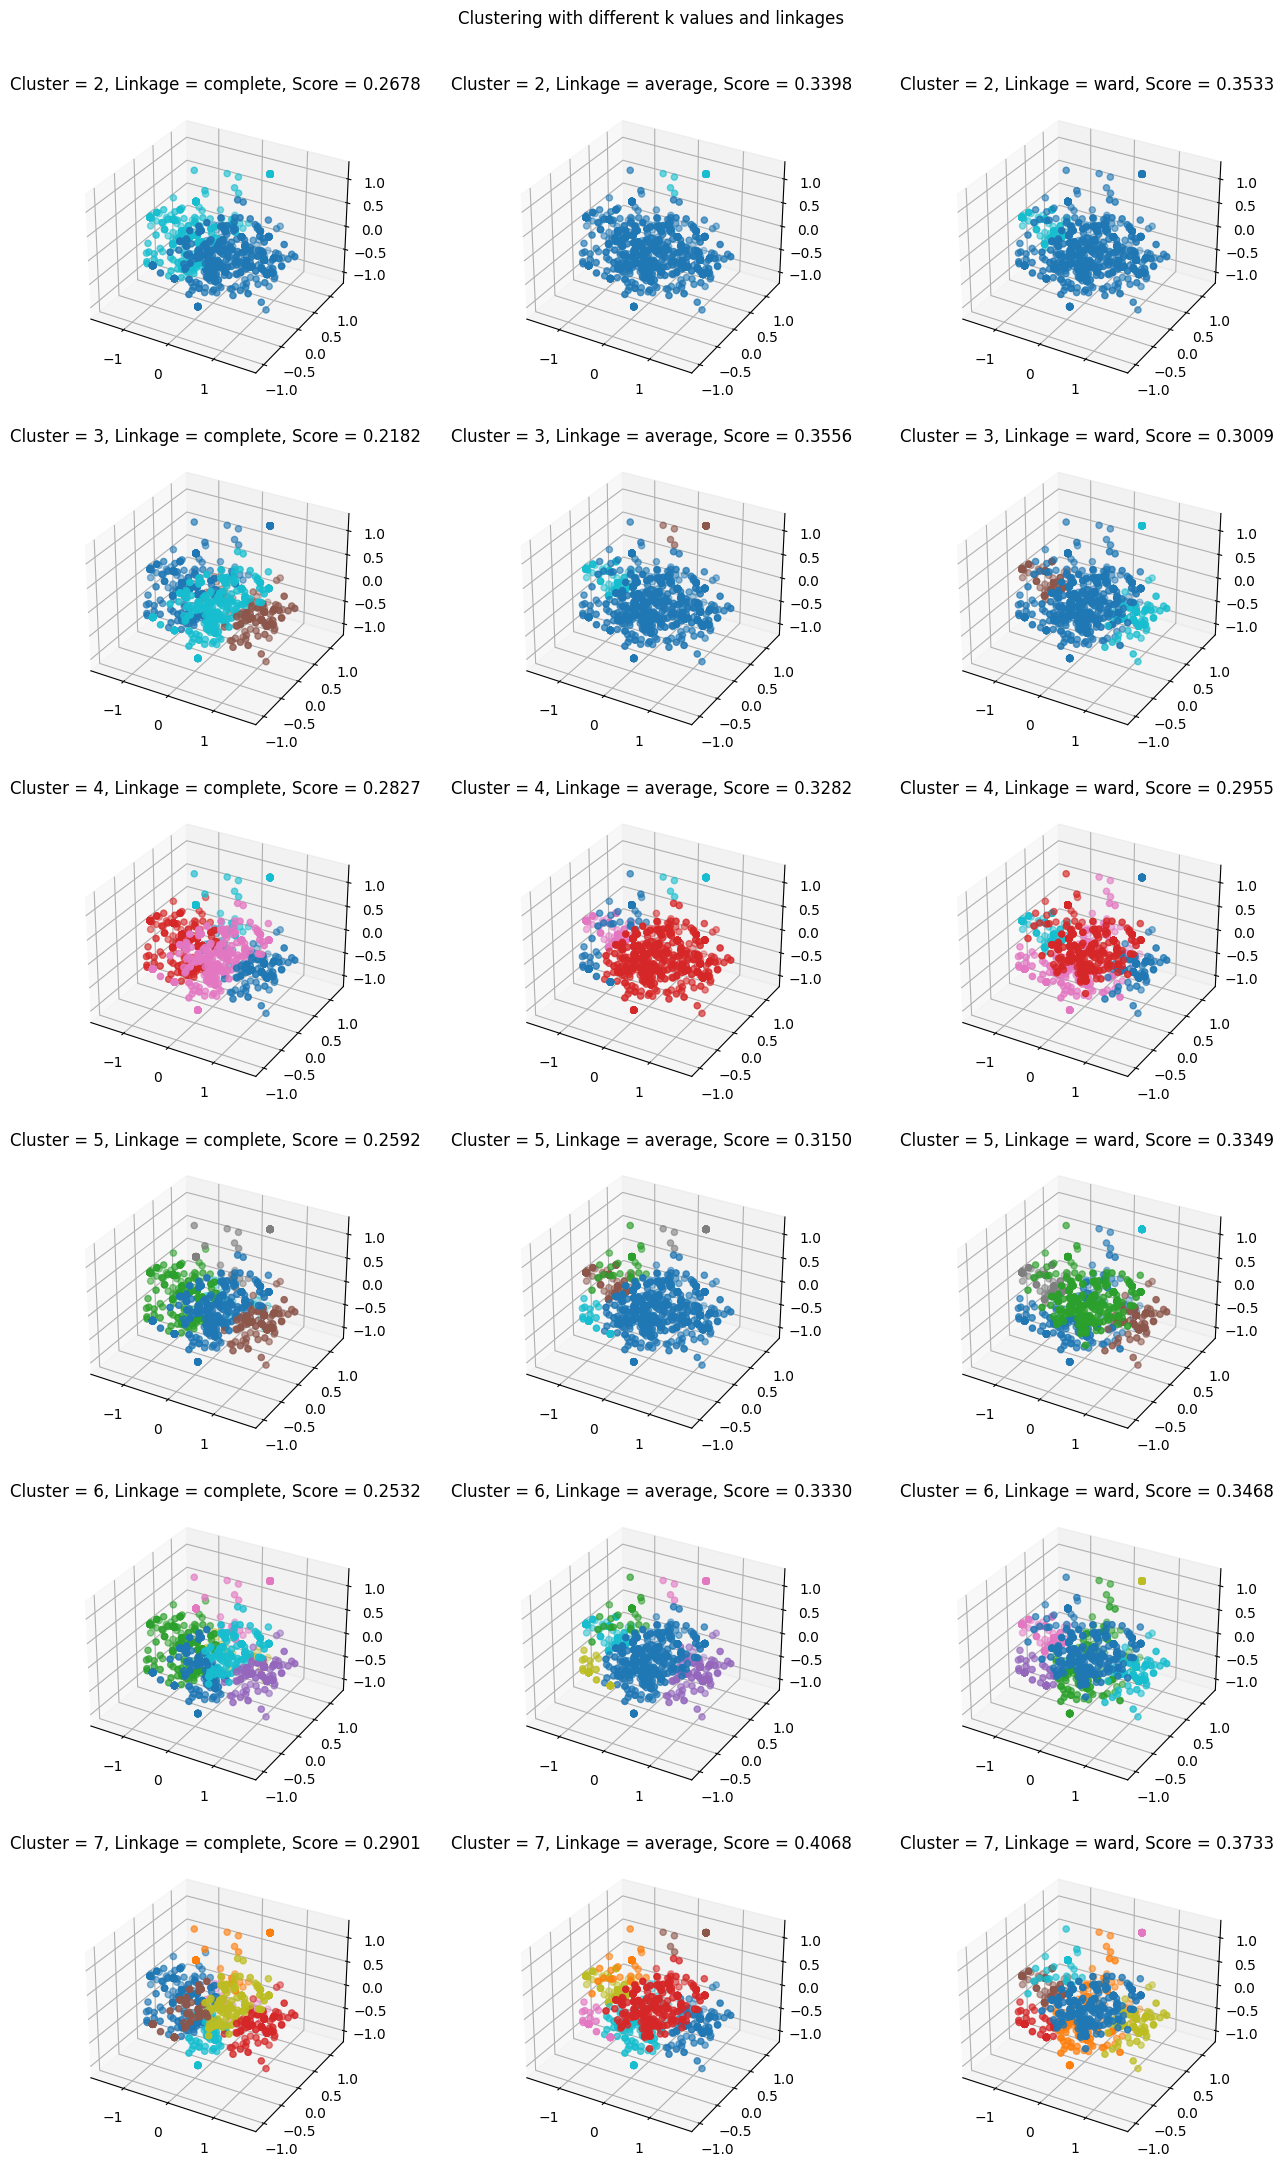

<Figure size 640x480 with 0 Axes>

In [106]:
ks = range(2, 8)
linkages = ['complete', 'average', 'ward']

best_model = None
best_score = float('-inf')

fig = plt.figure(figsize = (14, 22))

for i, cluster_num in enumerate(ks):
    for j, linkage_type in enumerate(linkages):
        ax = fig.add_subplot(len(ks), len(linkages), i * len(linkages) + j + 1, projection='3d')

        kmeans = AgglomerativeClustering(n_clusters = cluster_num, linkage = linkage_type, metric = 'euclidean')
        kmeans.fit(X_pca)
        labels = kmeans.labels_
        score = silhouette_score(X_pca, kmeans.labels_)

        ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap = plt.get_cmap("tab10"))
        ax.set_title(f'\nCluster = {cluster_num}, Linkage = {linkage_type}, Score = {score:.4f}')

        if score > best_score:
            best_score = score
            best_model = kmeans

plt.suptitle("Clustering with different k values and linkages\n\n")
plt.tight_layout()
plt.show()

plt.suptitle("Clustering with different k values and linkages\n\n")
plt.tight_layout()
plt.show()

In [109]:
print(f'score, num of clusters, linkage: {best_score:.3f}, {best_model.n_clusters_}, {best_model.linkage}')

score, num of clusters, linkage: 0.407, 7, average


In [110]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [111]:
X_pca_df.index

RangeIndex(start=0, stop=1175, step=1)

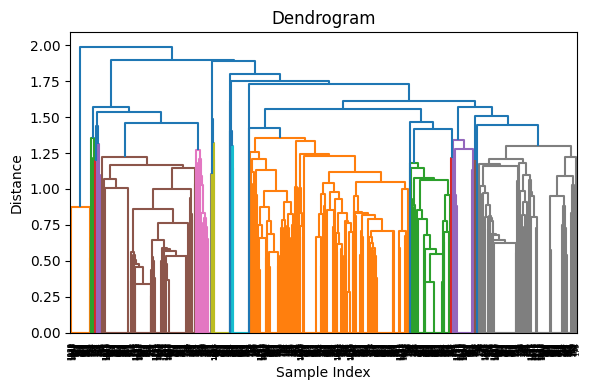

In [112]:
plt.figure(figsize = (6, 4))

dendrogram(
    linkage(X_scaled, method = best_model.linkage),
    labels = X_scaled.index,
    leaf_rotation = 90.,
    show_contracted = True,
    p = 7
)

# crtanje dendrograma
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')

plt.tight_layout()
plt.show()

## Analiza klastera

In [113]:
cluster_labels = best_model.labels_ 
    
cluster_data = []
cd = []

for i in range(7):
    cd.append(X[cluster_labels == i])
    mean_attributes = np.mean(cd[i], axis = 0)
    cluster_data.append(mean_attributes)
    cd[i] = pd.DataFrame(cd[i], columns = X.columns)
    
# kreiranje DataFrame-a
cluster_df = pd.DataFrame(cluster_data, columns = X.columns)

cluster_df

,occupation,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,prefer,certaindays_hw,time_change
0,5.030000,3.285000,3.180000,-0.450000,-0.712500,-0.670000,-0.807500,-0.760000,-0.625000,658.170000,0.050000,1.120000,1.025000
1,6.135593,1.542373,1.610169,0.406780,0.457627,0.872881,0.906780,0.262712,0.525424,260.796610,0.322034,0.338983,1.220339
2,4.754717,3.010782,2.956873,-0.179245,-0.137466,0.018868,0.388140,-0.051213,0.041779,481.110512,0.037736,0.708895,0.083558
3,2.163265,1.040816,1.979592,0.938776,-0.479592,-0.418367,-0.438776,-0.489796,-0.459184,107.346939,1.000000,0.000000,6.591837
4,2.698413,4.111111,3.142857,-0.658730,0.841270,0.857143,1.000000,0.841270,0.873016,1078.238095,0.047619,1.158730,-2.555556
5,4.985714,1.447619,2.066667,0.580952,0.395238,0.742857,0.785714,0.780952,0.545238,1072.238095,1.000000,2.000000,0.714286
6,5.856502,2.233184,3.035874,0.073991,-0.331839,0.262332,0.284753,0.020179,0.130045,1074.286996,0.152466,1.995516,0.152466


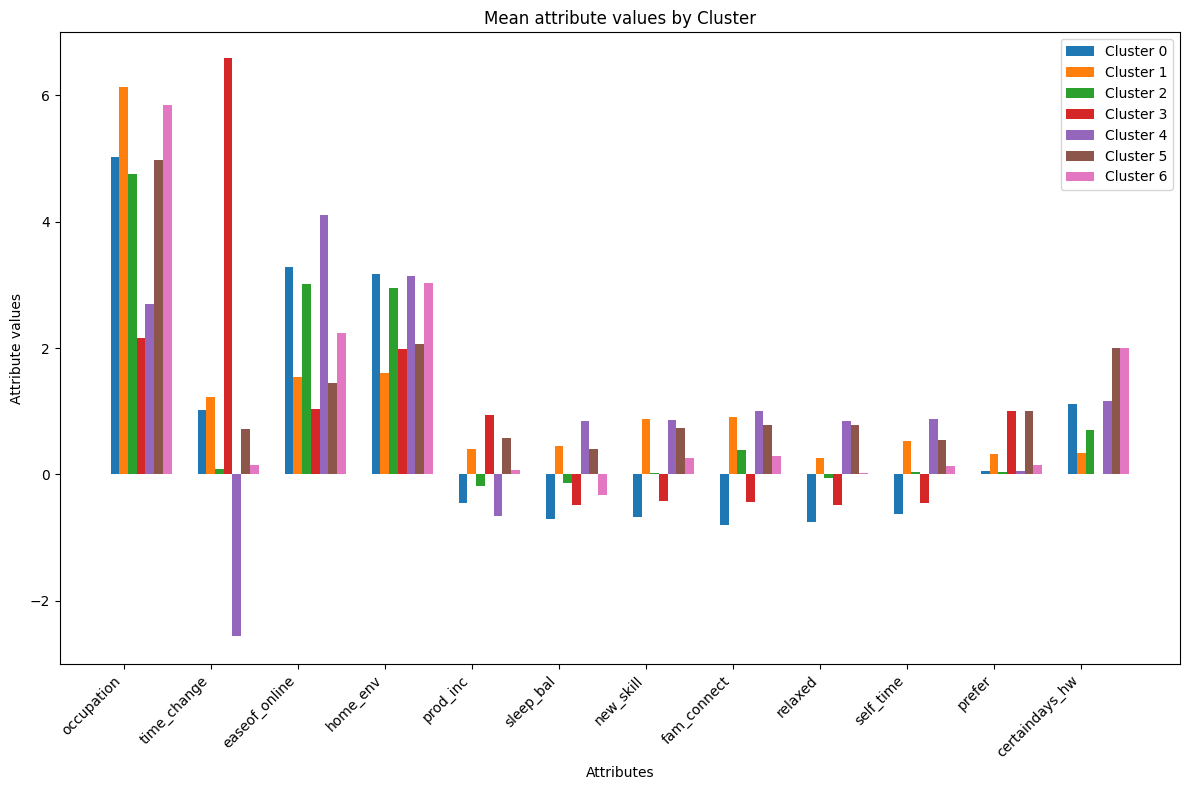

In [114]:
# s obzirom da like_hw i dislike_hw imaju velike vrednosti, nećemo ih predstaviti na grafiku, 
# ali može se zaključiti da oni itekako imaju veliki uticaj (različite vrednosti za klastere)
atr = ['occupation', 'time_change', 'easeof_online', 'home_env', 
       'prod_inc', 'sleep_bal', 'new_skill', 'fam_connect', 'relaxed', 'self_time', 'prefer', 'certaindays_hw']
plot_df = cluster_df[atr].T


colors = [plt.get_cmap("tab10")(0), plt.get_cmap("tab10")(1), plt.get_cmap("tab10")(2), plt.get_cmap("tab10")(3)]

# kreiranje grafikona sa grupisanim stubićima
plt.figure(figsize = (12, 8))

bar_width = 0.1  # Širina svake trake
index = np.arange(len(plot_df))  # pozicije za svaku grupu atributa

# prikazivanje grupisanih stubića za svaki atribut i svaku klasu
for i, col in enumerate(plot_df.columns):
    if col != 'like_hw' and col != 'dislike_hw':
        plt.bar(index + i * bar_width, plot_df[col], bar_width, label = f'Cluster {col}')

# postavljanje oznaka na osama
plt.xlabel('Attributes')
plt.ylabel('Attribute values')
plt.legend()

plt.xticks(index + bar_width, plot_df.index, rotation = 45, ha = 'right')
plt.ylim(-3.0, 7)

plt.title('Mean attribute values by Cluster')
plt.tight_layout()
plt.show()

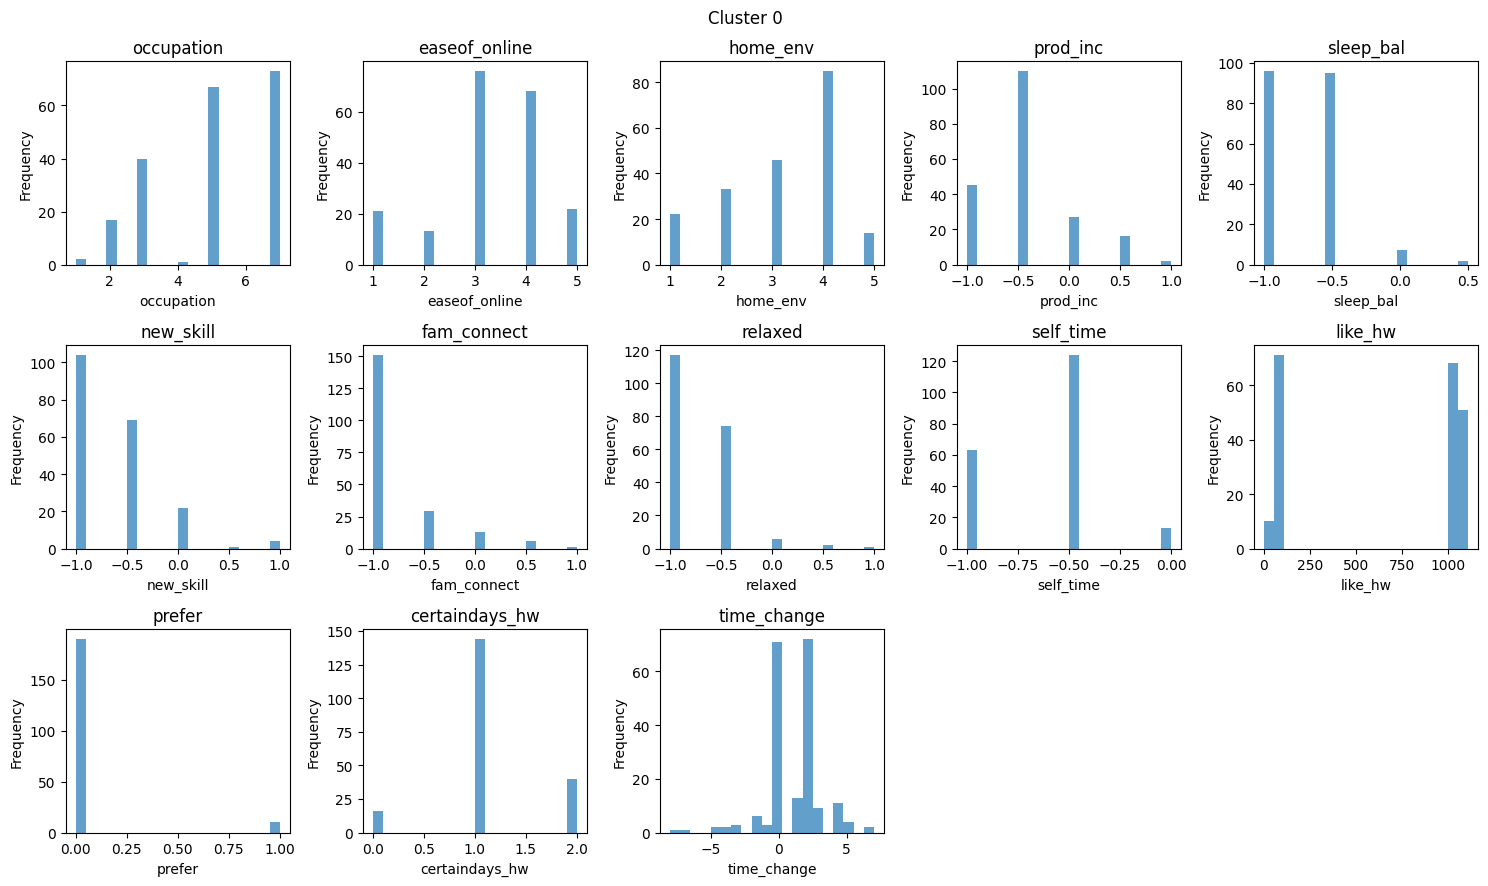

In [115]:
plt.figure(figsize = (15, 9))  
for col in cluster_df.columns:  
    plt.subplot(3, 5, cluster_df.columns.get_loc(col) + 1)  
    plt.hist(cd[0][col], bins = 20, alpha = 0.7, color = plt.get_cmap("tab10")(0))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.suptitle('Cluster 0')
plt.tight_layout()  
plt.show()

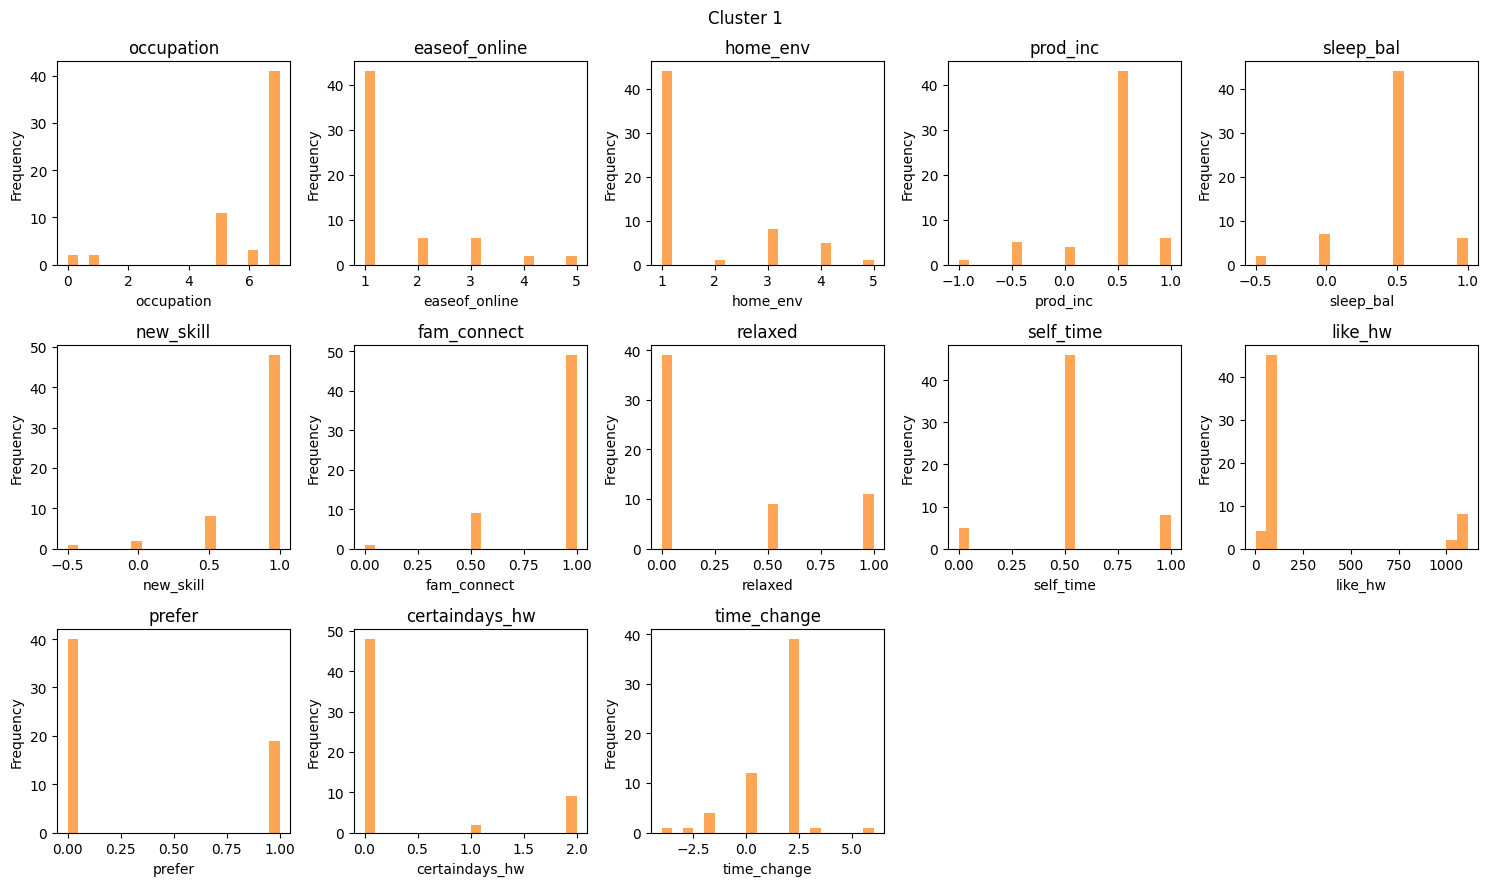

In [116]:
plt.figure(figsize = (15, 9))  
for col in cluster_df.columns:  
    plt.subplot(3, 5, cluster_df.columns.get_loc(col) + 1)  
    plt.hist(cd[1][col], bins = 20, alpha = 0.7, color = plt.get_cmap("tab10")(1))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.suptitle('Cluster 1')
plt.tight_layout()  
plt.show()

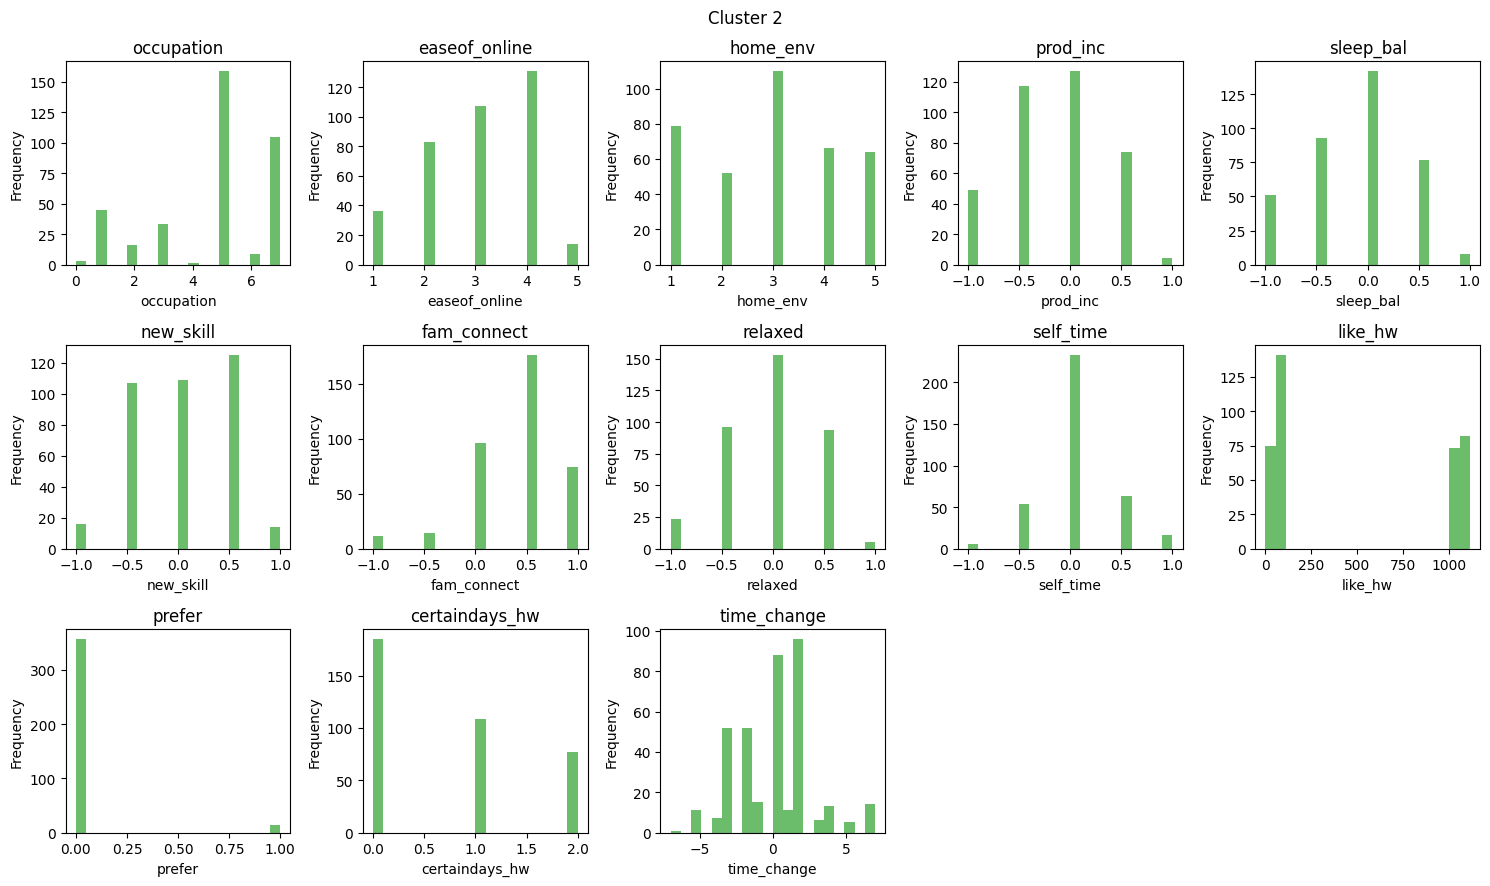

In [117]:
plt.figure(figsize = (15, 9))  
for col in cluster_df.columns:  
    plt.subplot(3, 5, cluster_df.columns.get_loc(col) + 1)  
    plt.hist(cd[2][col], bins = 20, alpha = 0.7, color = plt.get_cmap("tab10")(2))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.suptitle('Cluster 2')
plt.tight_layout()  
plt.show()

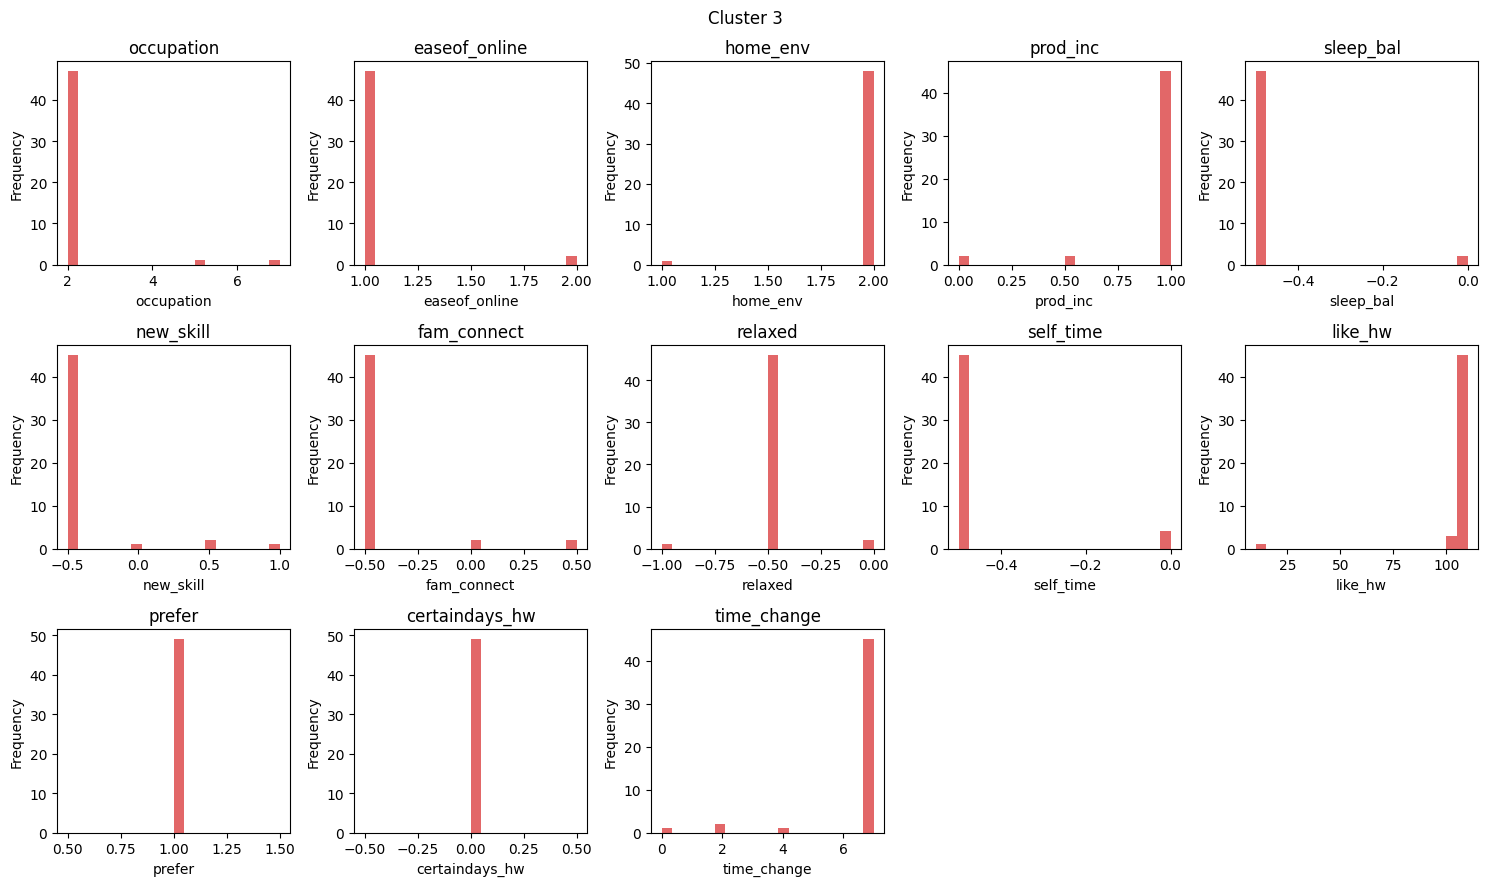

In [118]:
plt.figure(figsize = (15, 9))  
for col in cluster_df.columns:  
    plt.subplot(3, 5, cluster_df.columns.get_loc(col) + 1)  
    plt.hist(cd[3][col], bins = 20, alpha = 0.7, color = plt.get_cmap("tab10")(3))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.suptitle('Cluster 3')
plt.tight_layout()  
plt.show()

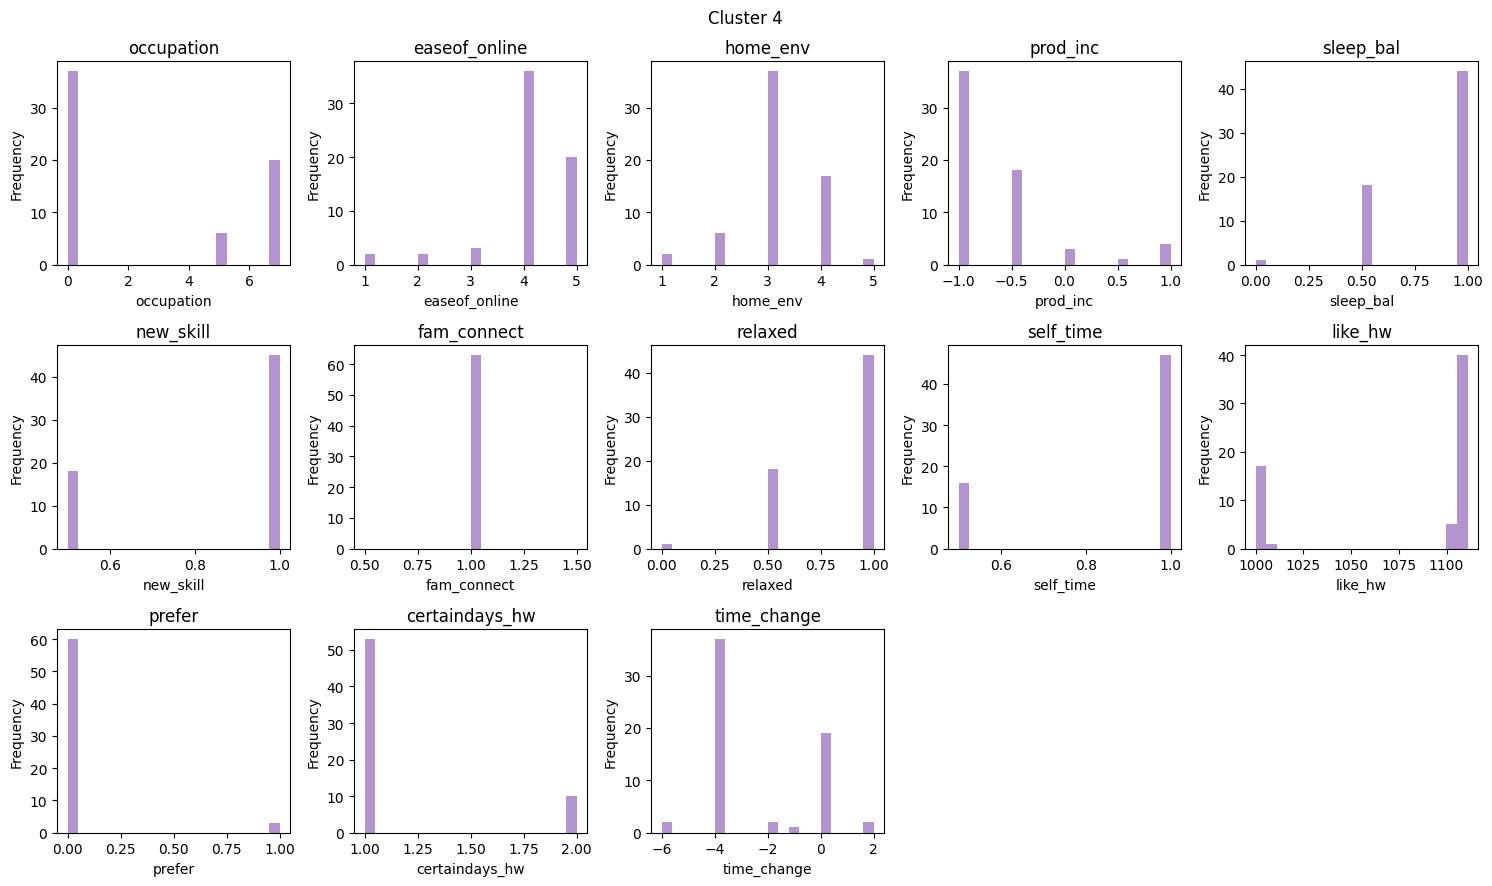

In [119]:
plt.figure(figsize = (15, 9))  
for col in cluster_df.columns:  
    plt.subplot(3, 5, cluster_df.columns.get_loc(col) + 1)  
    plt.hist(cd[4][col], bins = 20, alpha = 0.7, color = plt.get_cmap("tab10")(4))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.suptitle('Cluster 4')
plt.tight_layout()  
plt.show()

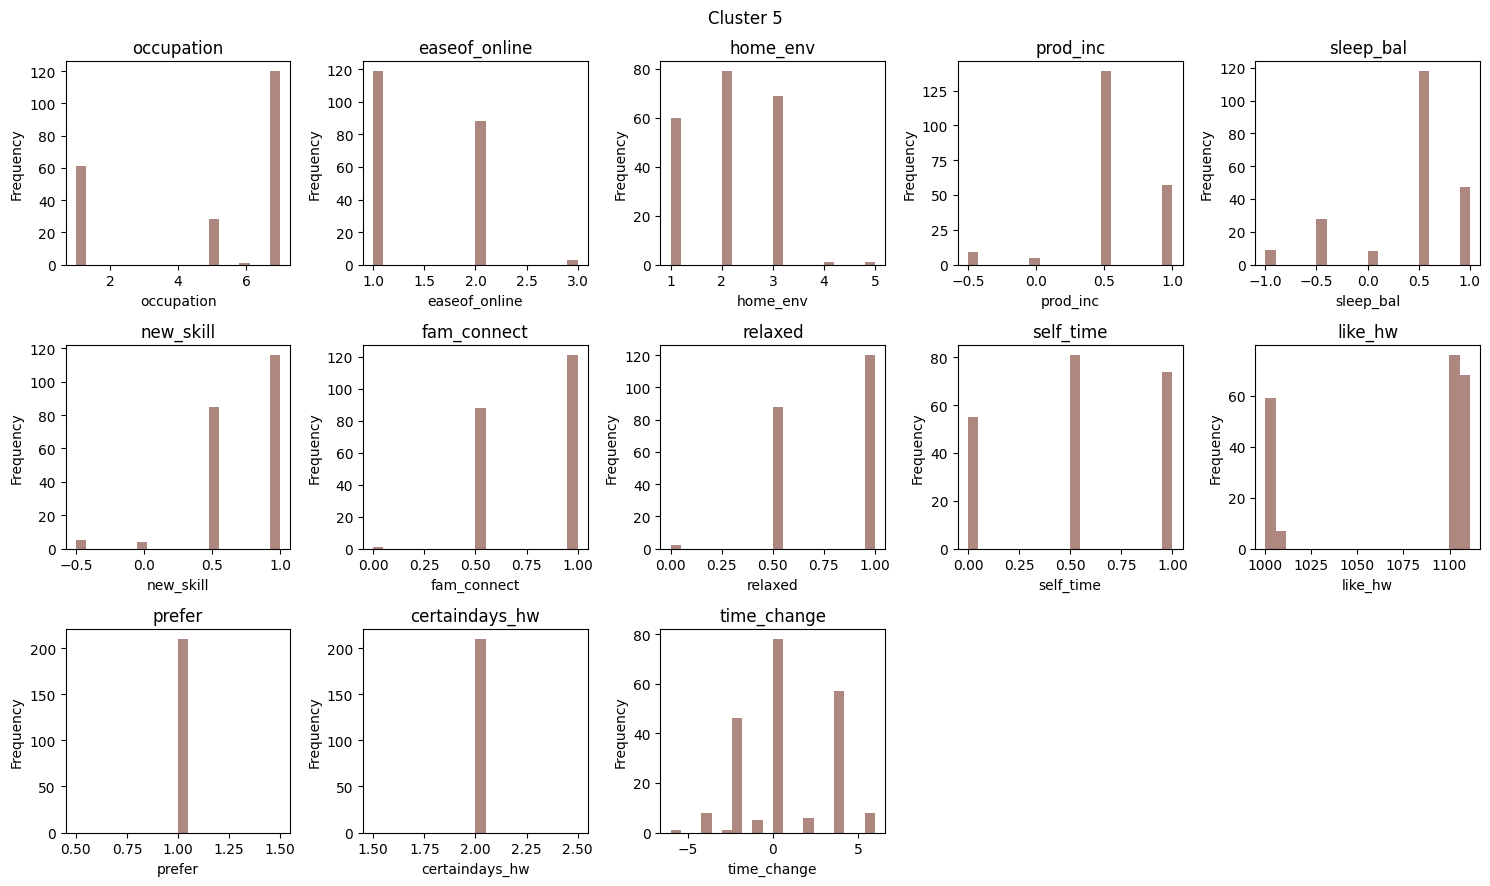

In [120]:
plt.figure(figsize = (15, 9))  
for col in cluster_df.columns:  
    plt.subplot(3, 5, cluster_df.columns.get_loc(col) + 1)  
    plt.hist(cd[5][col], bins = 20, alpha = 0.7, color = plt.get_cmap("tab10")(5))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.suptitle('Cluster 5')
plt.tight_layout()  
plt.show()

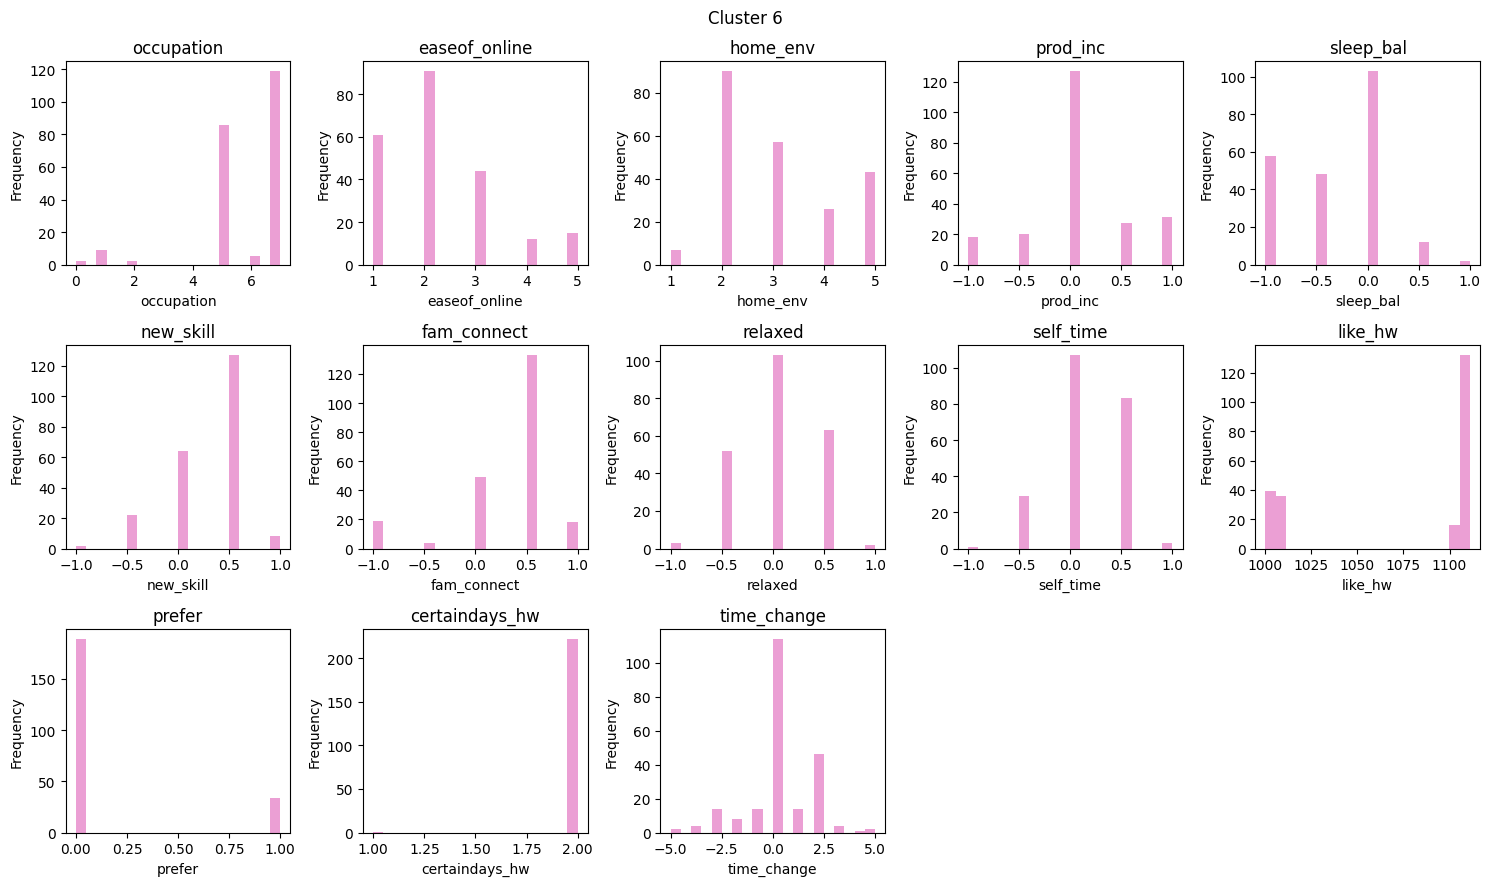

In [121]:
plt.figure(figsize = (15, 9))  
for col in cluster_df.columns:  
    plt.subplot(3, 5, cluster_df.columns.get_loc(col) + 1)  
    plt.hist(cd[6][col], bins = 20, alpha = 0.7, color = plt.get_cmap("tab10")(6))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.suptitle('Cluster 6')
plt.tight_layout()  
plt.show()

### Analiza

Klaster 0:

Pripadnici ovog klastera su dali niže ocene za opuštenošću, što ukazuje na potencijalno veći nivo stresa i napetosti. Takođe, njihove ocene za nove veštine, produktivnost, spavanje, povezanost sa porodicom su niske. Ovo je grupa ljudi koja je definitivno doživela negativne promene tokom pandemije.


Klaster 1:

Pripadnici ovog klastera su skloniji negativnijem pristupu promenama u pandemiji. Ova grupa ni u čemu nije Članovi ovog klastera su se lako prilagodili radu online, sticali nove vešstine, povezivali se sa porodicom,… što sugeriše na njihovo bolje psihološko blagostanje.


Klaster 2:

Pripadnici ovog klastera nisu doživeli neku značajniju promenu tokom pandemije.


Klaster 3:

Pripadnice ovog klastera su domaćice koje su najviše promenile svoje radno vreme, što je direktno uticalo na produktivnost. Međutim, u ostalim apsektima života su doživele blage negativne promene.


Klaster 4:

Ovaj klaster obuhvata pojedince koji su se tokom pandemije ostali bez posla, što je u direktnoj vezi sa smanjenjem njihove produktivnost. Međutim, to su dobro iskoristili za rad na sebi, zbližavanje s porodicom,…

Klaster 5:

Članovi ovog klastera često daju više ocene za online aktivnosti i sticanje novih veština, što ukazuje na otvorenost za proemen i učenje. Takođe su opušteni i skloni druženju.


Klaster 6:

Ova grupa pojedinaca je doživela blage pozitivne promene tokom pandemije.
